# Figure comparing weights, pressures and star formation rate surface densities, similar to Figure 13 in Jeffreson et al. 2024b, but for a single time

In [1]:
import numpy as np
import h5py
import glob, os, re, sys

from PRFMData import PRFMDataset
import astro_helper as ah

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as patches
from matplotlib import rc
rc('axes', linewidth=1.5)
rc('axes', edgecolor='#3C3C3C')
plt.style.use('mpl_style_Jeffreson.mplstyle')

In [2]:
labels = [r"$\mathbf{M_*=10^{10}{\rm M}_\odot}$",
          r"$\mathbf{M_*=10^{10.5}{\rm M}_\odot}$",
          r"$\mathbf{M_*=10^{11}{\rm M}_\odot}$",
          r"$\mathbf{M_*=10^{11.5}{\rm M}_\odot}$",
          r"NGC~300-like",
          r"Milky Way-like"]
colors = [plt.cm.magma((i+1)/5) for i in range(4)]
colors.append('#5E9F87')
colors.append('#3C3C3C')

# load full 2D arrays for pressures, weights and Sigma_SFRs

In [13]:
ETG_vlM = PRFMDataset(
    galaxy_type="ETG-vlM",
    total_height=0.3, # kpc
    Rmax=2., # kpc
    phibin_sep=np.pi/12.,
    snapname="snap-DESPOTIC_399.hdf5",
    exclude_temp_above=1.e4,
    exclude_avir_below=2.,
    realign_galaxy_to_disk=True, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
)

In [4]:
# ETG_lowM = PRFMDataset(
#     galaxy_type="ETG-lowM",
#     total_height=0.3, # kpc
#     Rmax=2., # kpc
#     phibin_sep=np.pi/12.,
#     snapname="snap-DESPOTIC_100.hdf5",
#     exclude_temp_above=1.e4,
#     exclude_avir_below=2.,
#     realign_galaxy_to_disk=True, # according to angular momentum vector of gas
#     required_particle_types=[0,1,2,3,4], # just gas by default
# )

In [14]:
ETG_medM = PRFMDataset(
    galaxy_type="ETG-medM",
    total_height=0.3, # kpc
    Rmax=2., # kpc
    phibin_sep=np.pi/12.,
    snapname="snap-DESPOTIC_399.hdf5",
    exclude_temp_above=1.e4,
    exclude_avir_below=2.,
    realign_galaxy_to_disk=True, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
)

In [7]:
# ETG_hiM = PRFMDataset(
#     galaxy_type="ETG-hiM",
#     total_height=0.3, # kpc
#     Rmax=2., # kpc
#     phibin_sep=np.pi/12.,
#     snapname="snap-DESPOTIC_100.hdf5",
#     exclude_temp_above=1.e4,
#     exclude_avir_below=2.,
#     realign_galaxy_to_disk=True, # according to angular momentum vector of gas
#     required_particle_types=[0,1,2,3,4], # just gas by default
# )

In [15]:
NGC300 = PRFMDataset(
    galaxy_type="NGC300",
    total_height=1.5, # kpc
    Rmax=6., # kpc
    phibin_sep=np.pi/12.,
    snapname="snap-DESPOTIC_799.hdf5",
    exclude_temp_above=1.e4,
    exclude_avir_below=2.,
    realign_galaxy_to_disk=True, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
)

In [16]:
# MW = PRFMDataset(
#     galaxy_type="MW",
#     total_height=1.5, # kpc
#     Rmax=13., # kpc
#     phibin_sep=np.pi/12.,
#     snapname="snap-DESPOTIC_600.hdf5",
#     exclude_temp_above=1.e4,
#     exclude_avir_below=2.,
#     realign_galaxy=False, # according to angular momentum vector of gas
#     required_particle_types=[0,1,2,3,4], # just gas by default
# )

In [17]:
data = [ETG_vlM, ETG_medM, NGC300]
Rmaxs_kpc = np.array([ETG_vlM.Rmax, ETG_medM.Rmax, NGC300.Rmax])/ah.kpc_to_cm
#data = [ETG_vlM, ETG_lowM, ETG_medM, ETG_hiM, NGC300]#, MW]
#Rmaxs_kpc = np.array([ETG_vlM.Rmax, ETG_lowM.Rmax, ETG_medM.Rmax, ETG_hiM.Rmax, NGC300.Rmax])/ah.kpc_to_cm#,MW.Rmax

In [18]:
keys = ['Ptot', 'Ptherm', 'Pturb', 'Weight', 'SigmaSFR']
props = []
for instance in data:
    props_dict = {}
    for key in keys:
        props_dict[key] = {}
        props_2D = instance.get_prop_by_keyword(key)
        props_dict[key]['mean'] = np.nanmean(props_2D, axis=1)
        props_dict[key]['med'] = np.nanmedian(props_2D, axis=1)
        props_dict[key]['std'] = np.std(props_2D, axis=1)
        props_dict[key]['q1'] = np.nanquantile(props_2D, 0.25, axis=1)
        props_dict[key]['q4'] = np.nanquantile(props_2D, 0.75, axis=1)
    props_dict['Rbin_centers'] = instance.Rbin_centers
    props.append(props_dict)

/n/home03/sjeffreson/pressure_regulated_SF_analysis/PRFMData.py:464: RuntimeWarning: invalid value encountered in divide
  veldisps_xyz.append(np.sqrt(sumveldisp/summass))
/n/home03/sjeffreson/pressure_regulated_SF_analysis/PRFMData.py:410: RuntimeWarning: invalid value encountered in divide
  meanvel /= summass
/n/home03/sjeffreson/pressure_regulated_SF_analysis/PRFMData.py:486: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(turbpress_3D, axis=2)


# figure

(0.232077, 0.059889, 0.437695, 1.0)
(0.550287, 0.161158, 0.505719, 1.0)
(0.868793, 0.287728, 0.409303, 1.0)


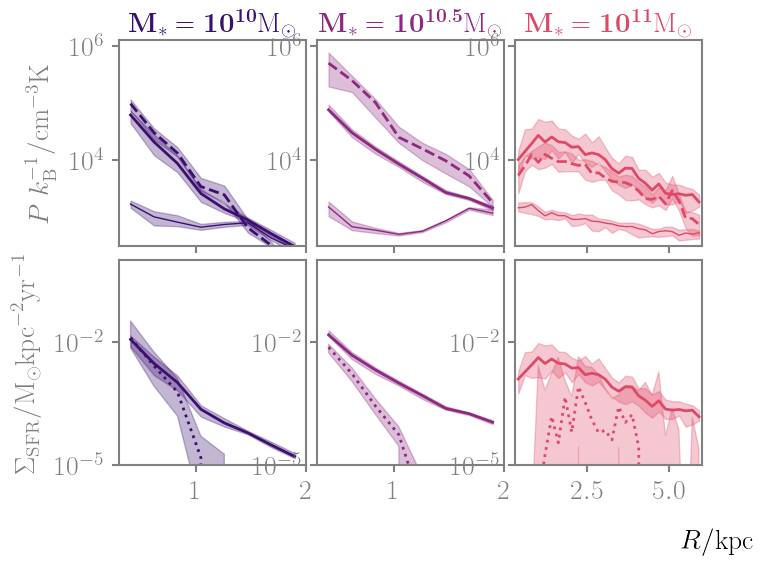

In [19]:
figW = 15
figH = 7
fig = plt.figure(figsize=(figW, figH))

botMarg = 0.1
wBetMarg = 0.007
topMarg = 0.02
leftMarg = 0.1
hBetMarg = 0.02

crightMarg = 0.105
cW = 0.015
cBet = 0.002
rightMarg = 0.03 + crightMarg + cW

h = (1.0-topMarg-botMarg)/3
w = (1.0-leftMarg-rightMarg)/6

### axes ###
axs_mid = []
for i, Rmax in zip(range(6), Rmaxs_kpc):
    if(i==0):
        ylabel=r'$P~k_{\rm B}^{-1}/{\rm cm}^{-3} {\rm K}$'
        ax = fig.add_axes([leftMarg+i*(w+wBetMarg), botMarg+(h+hBetMarg), w, h], ylim=[10.**2.5, 10.**6.1], xlim=[0.3, Rmax],
                         xlabel='', xticklabels='', ylabel=ylabel)
    else:
        ax = fig.add_axes([leftMarg+i*(w+wBetMarg), botMarg+(h+hBetMarg), w, h], ylim=[10.**2.5, 10.**6.1], xlim=[0.3, Rmax],
                         xlabel='', xticklabels='', yticklabels='')
    ax.set_yscale('log')
    axs_mid.append(ax)

axs_bot = []
for i, Rmax in zip(range(6), Rmaxs_kpc):
    if(i==0):
        ylabel=r'$\Sigma_{\rm SFR}/{\rm M}_\odot {\rm kpc}^{-2} {\rm yr}^{-1}$'
        ax = fig.add_axes([leftMarg+i*(w+wBetMarg), botMarg, w, h], ylim=[10.**(-5.), 1.], xlim=[0.3, Rmax],
                         xlabel='', ylabel=ylabel)
    else:
        ax = fig.add_axes([leftMarg+i*(w+wBetMarg), botMarg, w, h], ylim=[10.**(-5.), 1.], xlim=[0.3, Rmax],
                         xlabel='', yticklabels='')
    ax.set_yscale('log')
    axs_bot.append(ax)

for ax, label, color in zip(axs_mid, labels, colors):
    print(color)
    ax.set_title(label, color=color, fontsize=20)
fig.text(0.475, -0.02, r'$R/{\rm kpc}$')

### plot stuff
# weight vs. pressure
for ax, color, props_ in zip(axs_mid, colors, props):
    ax.plot(props_['Rbin_centers']/ah.kpc_to_cm, props_['Weight']['med'], color=color, lw=2, ls='dashed')
    ax.fill_between(props_['Rbin_centers']/ah.kpc_to_cm, props_['Weight']['q1'],
                    y2=props_['Weight']['q4'], alpha=0.3, color=color)

    ax.plot(props_['Rbin_centers']/ah.kpc_to_cm, props_['Ptot']['med'], color=color, lw=2)
    ax.fill_between(props_['Rbin_centers']/ah.kpc_to_cm, props_['Ptot']['q1'], y2=props_['Ptot']['q4'], alpha=0.3, color=color)

    ax.plot(props_['Rbin_centers']/ah.kpc_to_cm, props_['Ptherm']['med'], color=color, lw=1)
    ax.fill_between(props_['Rbin_centers']/ah.kpc_to_cm, props_['Ptherm']['q1'], y2=props_['Ptherm']['q4'], alpha=0.3, color=color)
    
# pressure vs. SFR
for ax, color, props_ in zip(axs_bot, colors, props):
    # SFRs
    ax.plot(
        props_['Rbin_centers'] / ah.kpc_to_cm,
        props_['SigmaSFR']['med'],
        color=color, lw=2, ls='dotted')
    ax.fill_between(props_['Rbin_centers'] / ah.kpc_to_cm,
                    props_['SigmaSFR']['q1'],
                    y2=props_['SigmaSFR']['q4'],
                    alpha=0.3, color=color)

    # pressures via Equation 6 of Jeffreson et al. 2024b
    ax.plot(props_['Rbin_centers'] / ah.kpc_to_cm,
            10.**(-7.86) * props_['Ptot']['med']**1.235,
            color=color, lw=2, label='total')
    ax.fill_between(props_['Rbin_centers'] / ah.kpc_to_cm,
                    10.**(-7.86) * props_['Ptot']['q1']**1.235,
                    y2=10.**(-7.86) * props_['Ptot']['q4']**1.235,
                    alpha=0.3, color=color)
    
# plt.savefig(
#     '/n/holystore01/LABS/itc_lab/Users/sjeffreson/ETGs/figs/rotcurves.pdf',
#     bbox_inches='tight',
#     format='pdf'
# )

plt.show()